<a href="https://colab.research.google.com/github/Mraghuvaran/Regreession-models/blob/master/Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload() 

Saving train_data.csv to train_data.csv


In [2]:
from google.colab import files 
uploaded = files.upload() 

Saving test_data.csv to test_data.csv


In [0]:
import pandas as pd
import numpy as np 


In [0]:
train_df = pd.read_csv("train_data.csv")

In [0]:
test_df = pd.read_csv("test_data.csv")

In [7]:
train_df.head()

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,state,77516.0,Bachelors,13,NaN,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,2,50.0,self_employed,83311.0,Bachelors,13,NaN,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,3,38.0,private,215646.0,HS-grad,9,NaN,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,4,53.0,private,234721.0,11th,7,NaN,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,5,28.0,private,338409.0,Bachelors,13,NaN,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [8]:
test_df.head()

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country
0,31588,28,private,183175,Some-college,10,5491.305588,1,Divorced,clerical,Not-in-family,White,Female,0,0,40,United-States
1,31589,29,local_body,115585,Some-college,10,3456.560000,0,Never-married,cleaner,Not-in-family,White,Male,0,0,50,United-States
2,31590,37,private,254202,Bachelors,13,3321.670000,0,Married-civilian,sales,Husband,White,Male,0,0,50,United-States
3,31591,71,self_employed,494223,Some-college,10,NaN,0,Separated,sales,Unmarried,Black,Male,0,1816,2,United-States
4,31592,27,private,253814,HS-grad,9,4840.481164,0,Married-non-resident,sales,Unmarried,White,Female,0,0,25,United-States


In [9]:
print("The number of rows & features in the train dataset are {}, {}.".format(train_df.shape[0],train_df.shape[1]))

The number of rows & features in the train dataset are 31587, 18.


In [10]:
print("The number of rows & features in the test_data set are {}, {}.". format(test_df.shape[0],test_df.shape[1]))

The number of rows & features in the test_data set are 976, 17.


In [11]:
train_df.dtypes

index                   int64
age                   float64
working_sector         object
financial_weight      float64
qualification          object
years_of_education      int64
tax_paid              float64
loan_taken              int64
marital_status         object
occupation             object
relationship           object
ethnicity              object
gender                 object
gain                  float64
loss                  float64
working_hours         float64
country                object
target                  int64
dtype: object

1. Loan_ taken is an categorical attribute with two levels. Yes or No.
2.Target has two levels can be converted to Category or Object. 
3.Financial weight is an unknown attribute in the data frame which means there isn o proper explanation in the data.

In [12]:
train_df.shape

(31587, 18)

In [13]:
test_df.shape

(976, 17)

In [0]:
#!pip install plotly_express

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
train_df.describe()

,index,age,financial_weight,years_of_education,tax_paid,loan_taken,gain,loss,working_hours,target
count,31587.000000,31585.000000,3.158500e+04,31587.000000,2381.000000,31587.000000,31585.000000,31585.000000,31585.000000,31587.000000
mean,15794.000000,38.560266,1.899756e+05,10.079146,6286.380419,0.050242,1090.173405,87.166566,40.439607,0.241207
std,9118.525813,13.632411,1.057192e+05,2.571846,2033.680490,0.218448,7444.382583,402.863825,12.368394,0.427822
min,1.000000,17.000000,1.228500e+04,1.000000,2010.469174,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7897.500000,28.000000,1.178810e+05,9.000000,5004.099923,0.000000,0.000000,0.000000,40.000000,0.000000
50%,15794.000000,37.000000,1.785640e+05,10.000000,6381.934626,0.000000,0.000000,0.000000,40.000000,0.000000
75%,23690.500000,48.000000,2.374660e+05,12.000000,7967.520312,0.000000,0.000000,0.000000,45.000000,0.000000
max,31587.000000,90.000000,1.484705e+06,16.000000,9997.840369,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [19]:
train_df.describe(include='object')

,working_sector,qualification,marital_status,occupation,relationship,ethnicity,gender,country
count,29812,31585,31587,29805,31585,31585,31585,31019
unique,7,16,7,14,6,5,2,41
top,private,HS-grad,Married-civilian,specialty,Husband,White,Male,United-States
freq,22033,10198,14540,3997,12815,26998,21136,28295


In [20]:
train_df.isnull().sum()

index                     0
age                       2
working_sector         1775
financial_weight          2
qualification             2
years_of_education        0
tax_paid              29206
loan_taken                0
marital_status            0
occupation             1782
relationship              2
ethnicity                 2
gender                    2
gain                      2
loss                      2
working_hours             2
country                 568
target                    0
dtype: int64

1. Drop tax_paid column since it is having nearly 92% missing values.
2.Remaining column values can be replaced using fillna method. 

In [0]:
train_df1 = train_df.dropna(axis=0)

In [22]:
px.histogram(data_frame=train_df1, x='age', color='gender')

NameError: ignored

Seems people from age 20 to 50 are the most ones includes in the data & people tend to fall as a High income & low income.

In [0]:
import seaborn as sns

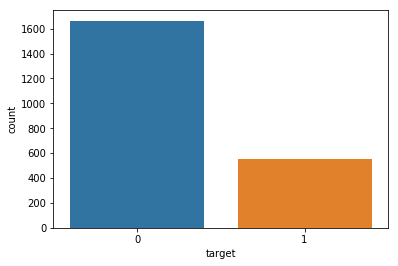

In [25]:
sns.countplot(data= train_df1, x='target')

In [26]:
train_df1.target.value_counts()

0    1664
1     552
Name: target, dtype: int64

This is class imbalance problem of the target attribute.

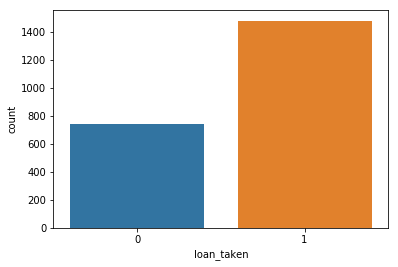

In [27]:
sns.countplot(data= train_df1, x='loan_taken')

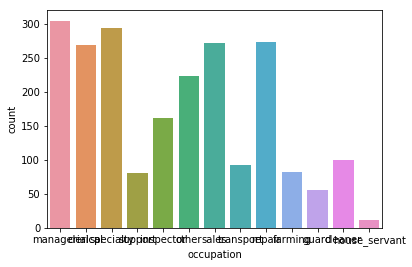

In [28]:
sns.countplot(data=train_df1, x='occupation')

In [29]:
  train_df.dtypes

index                   int64
age                   float64
working_sector         object
financial_weight      float64
qualification          object
years_of_education      int64
tax_paid              float64
loan_taken              int64
marital_status         object
occupation             object
relationship           object
ethnicity              object
gender                 object
gain                  float64
loss                  float64
working_hours         float64
country                object
target                  int64
dtype: object

In [30]:
train_df.isnull().mean()

index                 0.000000
age                   0.000063
working_sector        0.056194
financial_weight      0.000063
qualification         0.000063
years_of_education    0.000000
tax_paid              0.924621
loan_taken            0.000000
marital_status        0.000000
occupation            0.056416
relationship          0.000063
ethnicity             0.000063
gender                0.000063
gain                  0.000063
loss                  0.000063
working_hours         0.000063
country               0.017982
target                0.000000
dtype: float64

In [31]:
#filling Missing values 

# Working_sector missing values. 

print(train_df.working_sector.value_counts())
print("\n")
print(train_df.occupation.value_counts())
print("\n")
print(train_df.country.value_counts().head())

private          22033
self_employed     3543
local_body        2019
state             1274
national           923
without_pay         13
not_worked           7
Name: working_sector, dtype: int64


specialty        3997
repair           3975
managerial       3943
clerical         3658
sales            3558
other            3214
inspector        1936
transport        1541
cleaner          1331
farming           963
support           904
guard             631
house_servant     145
defence             9
Name: occupation, dtype: int64


 United-States    28295
 Mexico             623
 Philippines        193
 Germany            133
 Canada             117
Name: country, dtype: int64


In [0]:
train_df.working_sector.fillna(value='private',inplace=True)
train_df.occupation.fillna(value='speciality', inplace=True)
train_df.country.fillna(value='United-States', inplace=True)

In [33]:
train_df.isnull().sum()

index                     0
age                       2
working_sector            0
financial_weight          2
qualification             2
years_of_education        0
tax_paid              29206
loan_taken                0
marital_status            0
occupation                0
relationship              2
ethnicity                 2
gender                    2
gain                      2
loss                      2
working_hours             2
country                   0
target                    0
dtype: int64

In [0]:
train_df.drop(columns='tax_paid', inplace=True, axis = 1)

In [35]:
train_df.shape

(31587, 17)

In [0]:
train_df.dropna(axis=0,inplace=True)

In [37]:
train_df.shape

(31585, 17)

In [38]:
train_df.isnull().sum()

index                 0
age                   0
working_sector        0
financial_weight      0
qualification         0
years_of_education    0
loan_taken            0
marital_status        0
occupation            0
relationship          0
ethnicity             0
gender                0
gain                  0
loss                  0
working_hours         0
country               0
target                0
dtype: int64

In [39]:
test_df.isnull().sum()

index                   0
age                     0
working_sector         63
financial_weight        0
qualification           0
years_of_education      0
tax_paid              804
loan_taken              0
marital_status          0
occupation             63
relationship            0
ethnicity               0
gender                  0
gain                    0
loss                    0
working_hours           0
country                17
dtype: int64

In [0]:
#missing value imputation on the test dataset

test_df.working_sector.fillna(value='private',inplace=True)
test_df.occupation.fillna(value='speciality', inplace=True)
test_df.country.fillna(value='United-States', inplace=True)

In [41]:
test_df.isnull().sum()

index                   0
age                     0
working_sector          0
financial_weight        0
qualification           0
years_of_education      0
tax_paid              804
loan_taken              0
marital_status          0
occupation              0
relationship            0
ethnicity               0
gender                  0
gain                    0
loss                    0
working_hours           0
country                 0
dtype: int64

In [0]:
test_df.drop(columns='tax_paid', axis=1, inplace=True)

In [43]:
test_df.shape

(976, 16)

In [0]:
from sklearn import preprocessing

In [0]:
for x in train_df.columns:
  if train_df[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[x].values))
        train_df[x] = lbl.transform(list(train_df[x].values))

In [46]:
train_df.head()

,index,age,working_sector,financial_weight,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,5,77516.0,9,13,0,4,1,1,4,1,2174.0,0.0,40.0,38,0
1,2,50.0,4,83311.0,9,13,0,1,7,0,4,1,0.0,0.0,13.0,38,0
2,3,38.0,3,215646.0,11,9,0,0,0,1,4,1,0.0,0.0,40.0,38,0
3,4,53.0,3,234721.0,1,7,0,1,0,0,2,1,0.0,0.0,40.0,38,0
4,5,28.0,3,338409.0,9,13,0,1,12,5,2,0,0.0,0.0,40.0,4,0


In [47]:
train_df.dtypes
  

index                   int64
age                   float64
working_sector          int64
financial_weight      float64
qualification           int64
years_of_education      int64
loan_taken              int64
marital_status          int64
occupation              int64
relationship            int64
ethnicity               int64
gender                  int64
gain                  float64
loss                  float64
working_hours         float64
country                 int64
target                  int64
dtype: object

In [0]:
train_df['age'] = train_df['age'].astype('int')
train_df['financial_weight'] = train_df['financial_weight'].astype('int')
train_df['gain'] = train_df['gain'].astype('int')
train_df['working_hours'] = train_df.astype('int')
train_df['loss'] = train_df['loss'].astype('int')

In [49]:
train_df.dtypes

index                 int64
age                   int64
working_sector        int64
financial_weight      int64
qualification         int64
years_of_education    int64
loan_taken            int64
marital_status        int64
occupation            int64
relationship          int64
ethnicity             int64
gender                int64
gain                  int64
loss                  int64
working_hours         int64
country               int64
target                int64
dtype: object

In [0]:
#importing functions & packages 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import scorer, accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
X = train_df.loc[:, train_df.columns != 'target']
y= train_df['target']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)


In [0]:
clf = RandomForestClassifier(n_estimators= 100, max_depth=6)

In [54]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
clf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
clf.predict(x_test)

array([0, 0, 0, ..., 1, 0, 1])

In [57]:
#make prediction and check model's accuracy
prediction = clf.predict(x_test)
acc =  accuracy_score(np.array(y_test),prediction)
print ('The accuracy of Random Forest is {}'.format(acc))

The accuracy of Random Forest is 0.8517306880540312


In [0]:
#GridsearchCV

from sklearn.model_selection import GridSearchCV

clf1 = RandomForestClassifier()

param_grid = {'n_estimators':[15,20,25,30],
             'max_depth':[3,5,7,9,11,15],
             'max_features':[3,4,5,6]}

In [59]:
%%time 
grid_cls = GridSearchCV(estimator=clf1, param_grid= param_grid, n_jobs=-1, cv=5)

grid_cls.fit(x_train, y_train)

CPU times: user 4.68 s, sys: 297 ms, total: 4.98 s
Wall time: 2min 39s


In [60]:
grid_cls.best_params_

{'max_depth': 15, 'max_features': 5, 'n_estimators': 30}

In [61]:
grid_cls.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
pred_score = grid_cls.predict(x_test)
acc =  accuracy_score(np.array(y_test),pred_score)
print ('The accuracy of Random Forest is {}'.format(acc))

The accuracy of Random Forest is 0.8559518784297172


**Gradient Boosting**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


gbm_param_grid = {'max_depth': [8,10,12,14], 'subsample': [0.8, 0.6,], 'max_features':[0.2, 0.3], 
              'n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(gbc, param_grid=gbm_param_grid, cv=3)



In [64]:
%%time
gbm_grid.fit(x_train,y_train)

CPU times: user 3min 7s, sys: 48.7 ms, total: 3min 7s
Wall time: 3min 7s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [65]:
gbm_grid.best_params_

{'max_depth': 10, 'max_features': 0.3, 'n_estimators': 30, 'subsample': 0.8}

In [66]:
train_pred = gbm_grid.predict(x_train)
test_pred = gbm_grid.predict(x_test)

print(gbm_grid.score(x_train, y_train))
print(gbm_grid.score(x_test, y_test))


0.8967388846171243
0.8591177712114816
